<a href="https://colab.research.google.com/github/cauliyang/one-classifier/blob/master/notebooks/001-explore-data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# Fetch a single <1MB file using the raw GitHub URL.
!curl --remote-name \
     -H 'Accept: application/vnd.github.v3.raw' \
     --location https://raw.githubusercontent.com/cauliyang/one-classifier/master/data/Reflnc_lncRNA_transcripts_hallmark_zscore_tcga_withstats_maxmean.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   99k  100   99k    0     0   564k      0 --:--:-- --:--:-- --:--:--  564k


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [13]:
df = pd.read_csv('Reflnc_lncRNA_transcripts_hallmark_zscore_tcga_withstats_maxmean.txt', sep='\t')

In [14]:
df.head() 

,tcga_cancer,gene_name,Oncogene..o..or.Tumour.Supp.t.,Transcript_id,mean,median,std,HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION,HALLMARK_ALLOGRAFT_REJECTION,HALLMARK_PROTEIN_SECRETION,HALLMARK_ANDROGEN_RESPONSE,HALLMARK_INTERFERON_GAMMA_RESPONSE,HALLMARK_MTORC1_SIGNALING,HALLMARK_PANCREAS_BETA_CELLS,HALLMARK_TNFA_SIGNALING_VIA_NFKB,HALLMARK_MYC_TARGETS_V1,HALLMARK_ANGIOGENESIS,HALLMARK_KRAS_SIGNALING_UP,HALLMARK_PEROXISOME,HALLMARK_HYPOXIA,HALLMARK_INTERFERON_ALPHA_RESPONSE,HALLMARK_COAGULATION,HALLMARK_APICAL_SURFACE,HALLMARK_COMPLEMENT,HALLMARK_INFLAMMATORY_RESPONSE,HALLMARK_CHOLESTEROL_HOMEOSTASIS,HALLMARK_IL6_JAK_STAT3_SIGNALING,HALLMARK_APOPTOSIS,HALLMARK_GLYCOLYSIS,HALLMARK_ESTROGEN_RESPONSE_LATE,HALLMARK_IL2_STAT5_SIGNALING,HALLMARK_BILE_ACID_METABOLISM,HALLMARK_SPERMATOGENESIS,HALLMARK_XENOBIOTIC_METABOLISM,HALLMARK_FATTY_ACID_METABOLISM,HALLMARK_UV_RESPONSE_DN,HALLMARK_TGF_BETA_SIGNALING,HALLMARK_E2F_TARGETS,HALLMARK_UNFOLDED_PROTEIN_RESPONSE,HALLMARK_UV_RESPONSE_UP,HALLMARK_ADIPOGENESIS,HALLMARK_PI3K_AKT_MTOR_SIGNALING,HALLMARK_OXIDATIVE_PHOSPHORYLATION,HALLMARK_G2M_CHECKPOINT,HALLMARK_NOTCH_SIGNALING,HALLMARK_ESTROGEN_RESPONSE_EARLY,HALLMARK_P53_PATHWAY,HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY,HALLMARK_HEME_METABOLISM,HALLMARK_KRAS_SIGNALING_DN,HALLMARK_MYOGENESIS,HALLMARK_APICAL_JUNCTION,HALLMARK_HEDGEHOG_SIGNALING,HALLMARK_DNA_REPAIR,HALLMARK_WNT_BETA_CATENIN_SIGNALING,HALLMARK_MYC_TARGETS_V2,HALLMARK_MITOTIC_SPINDLE
0,BLCA,AATBC,o,ENST00000400385.2,2.302851,0.440279,6.354740,1.306300,1.187851,0.944441,0.932241,0.925669,0.816939,0.759021,0.653808,0.653245,0.566418,-0.779816,-1.024763,-1.030880,-1.122837,-1.205916,-1.261795,-1.270099,-1.283590,-1.293687,-1.313290,-1.358895,-1.388861,-1.408948,-1.459400,-1.475771,-1.494124,-1.515061,-1.566466,-1.614944,-1.638529,-1.827601,-1.828641,-1.862322,-1.887359,-1.897400,-1.938356,-1.940795,-2.031868,-2.207244,-2.311837,-2.409199,-2.440225,-2.511253,-2.545319,-2.624907,-2.705777,-2.767922,-2.804604,-3.035088,-3.050652
1,LUAD,AC093901.1,o,ENST00000449075.1,0.028166,0.000000,0.098955,-1.636057,1.160086,0.641113,-0.823169,-0.951796,-1.684527,-0.663554,-0.920375,-1.331508,-1.319305,0.957131,-1.077224,1.196175,1.336296,-1.401677,-0.911695,-1.770281,-0.837839,1.807959,0.911313,0.894326,1.372731,-1.850499,-0.787276,-1.636448,1.880304,1.199504,1.633519,-0.918315,-1.047054,-1.307645,0.713868,-1.408802,1.262115,-1.427614,-0.924285,1.949909,1.404749,1.157020,1.853058,-0.988799,0.923268,-2.083474,2.495741,2.317579,2.901291,2.685818,1.524356,1.924150,3.006510
2,LUAD,ACTA2-AS1,o,ENST00000437930.4,0.515876,0.000000,1.490734,1.848051,2.350493,1.936609,2.583764,1.783060,2.702049,3.165189,2.338192,1.449029,-1.171735,2.783341,2.092296,3.152347,-1.243525,1.460042,2.287262,0.859580,2.140701,-1.203824,1.411070,-2.222718,-1.656930,-0.827936,-1.521584,1.048082,-1.473496,1.096127,0.965791,1.078554,0.751734,-1.311853,1.128939,-0.792083,-2.187238,0.863494,-0.840621,-2.112071,1.033989,-1.082354,0.921044,-1.351112,-1.639242,-1.261665,-1.491414,-1.004218,-1.885903,-2.125352,-0.782360,-1.462652,-1.407572
3,GBM,ADAMTS9-AS2,t,ENST00000474768.5,0.023929,0.000000,0.041569,-1.890974,1.695666,0.648638,2.326331,2.421076,2.225525,2.022952,1.841668,1.230825,1.435135,1.935652,1.752496,1.967920,-1.176093,0.816809,1.406938,1.831065,-1.445632,1.472623,-1.837413,-1.299131,-0.957957,0.867400,-1.003041,1.403075,1.696623,0.577860,1.011917,1.428074,1.026219,-1.210198,1.988175,1.538691,1.763233,0.712807,1.668214,1.232070,1.678342,1.170584,1.028651,1.495784,1.344214,1.929150,-1.407016,-1.492470,0.692456,-1.902093,1.107165,-1.353206,1.274530
4,LUAD,AFAP1-AS1,o,ENST00000608442.1,6.772263,3.092153,8.437658,2.038488,1.916482,1.899480,1.810419,1.716922,1.701108,1.635442,1.578635,1.575071,1.573061,1.572172,1.486154,1.444484,1.439130,1.430395,1.414251,1.383313,1.266298,1.264921,1.170569,1.141006,1.127302,1.113966,1.078573,1.058911,1.048171,1.036271,1.004540,0.969073,0.968409,0.883579,0.867150,0.819253,-0.861880,-0.901541,-0.965149,-0

In [15]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 57 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   tcga_cancer                                 104 non-null    object 
 1   gene_name                                   104 non-null    object 
 2   Oncogene..o..or.Tumour.Supp.t.              104 non-null    object 
 3   Transcript_id                               104 non-null    object 
 4   mean                                        104 non-null    float64
 5   median                                      104 non-null    float64
 6   std                                         104 non-null    float64
 7   HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION  104 non-null    float64
 8   HALLMARK_ALLOGRAFT_REJECTION                104 non-null    float64
 9   HALLMARK_PROTEIN_SECRETION                  104 non-null    float64
 10  HALLMARK_ANDRO

In [18]:

df_hallmarker = df.iloc[:,7:]

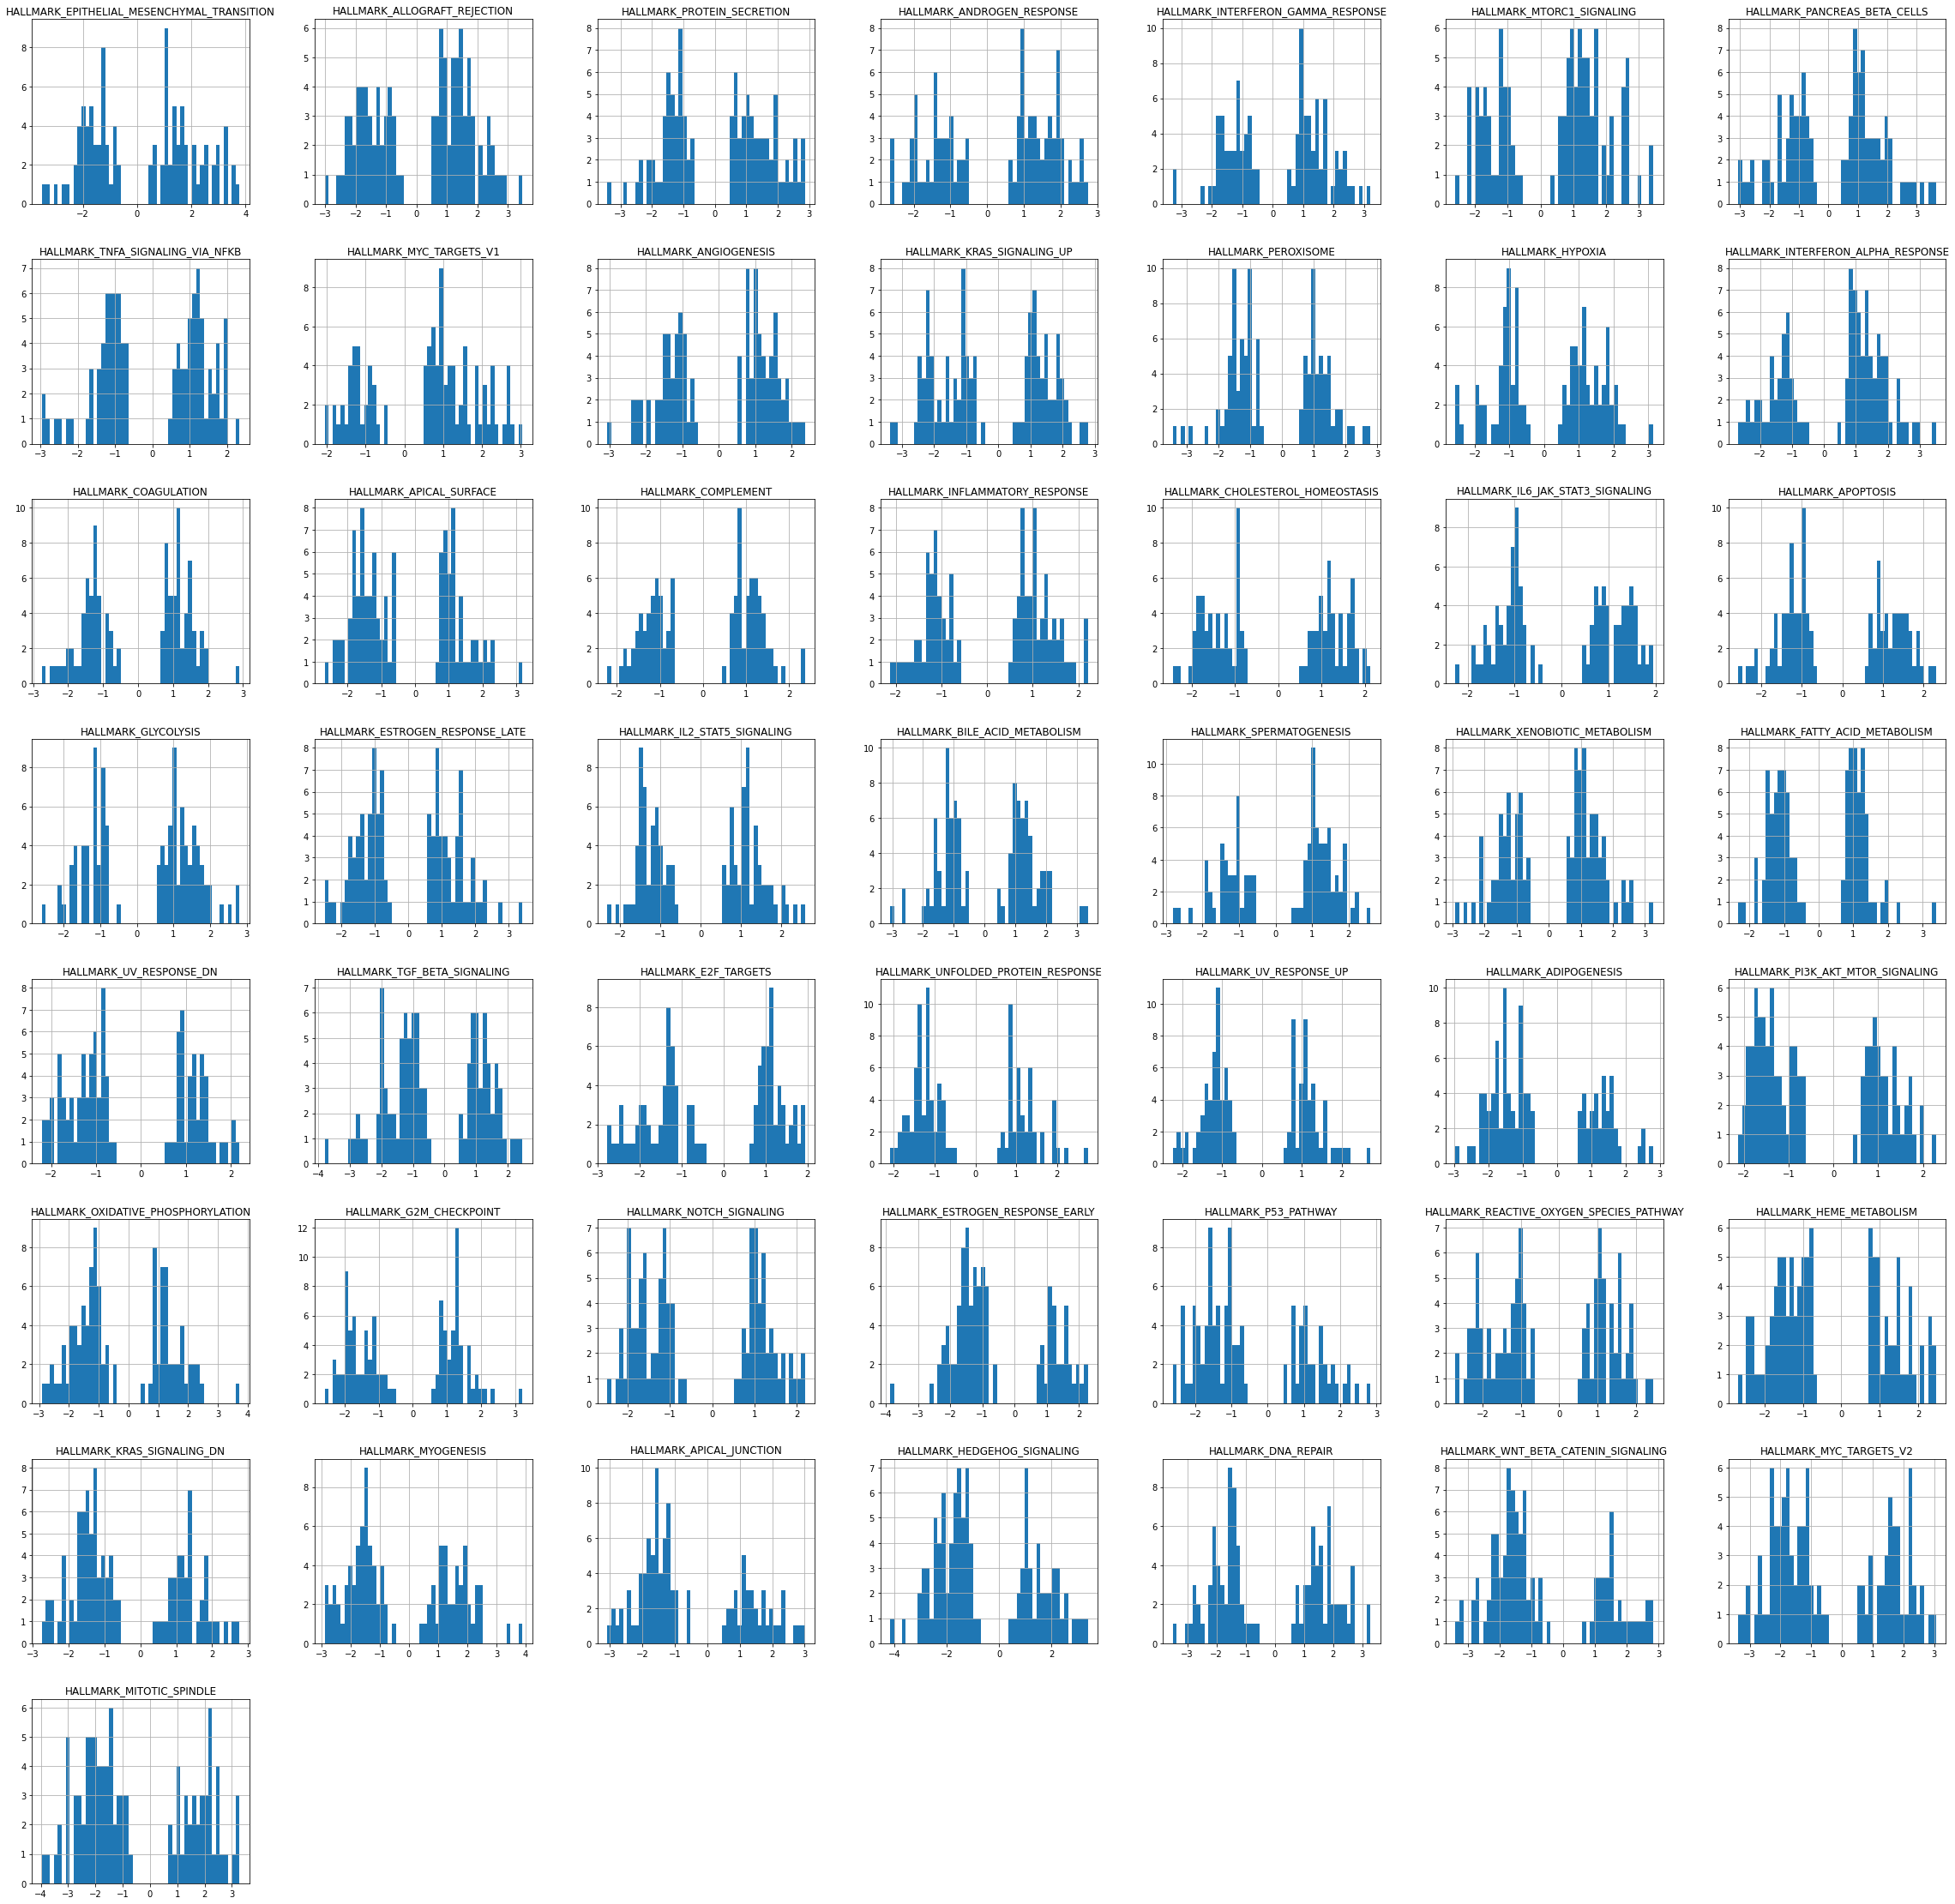

In [26]:

_ = df_hallmarker.hist(bins=50, figsize=(40,40)) 

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
standardscaler = StandardScaler() 

In [30]:
x = df_hallmarker.values

In [33]:
x_std = standardscaler.fit_transform(x) 


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa4a3fb61d0>,
      dtype=object)

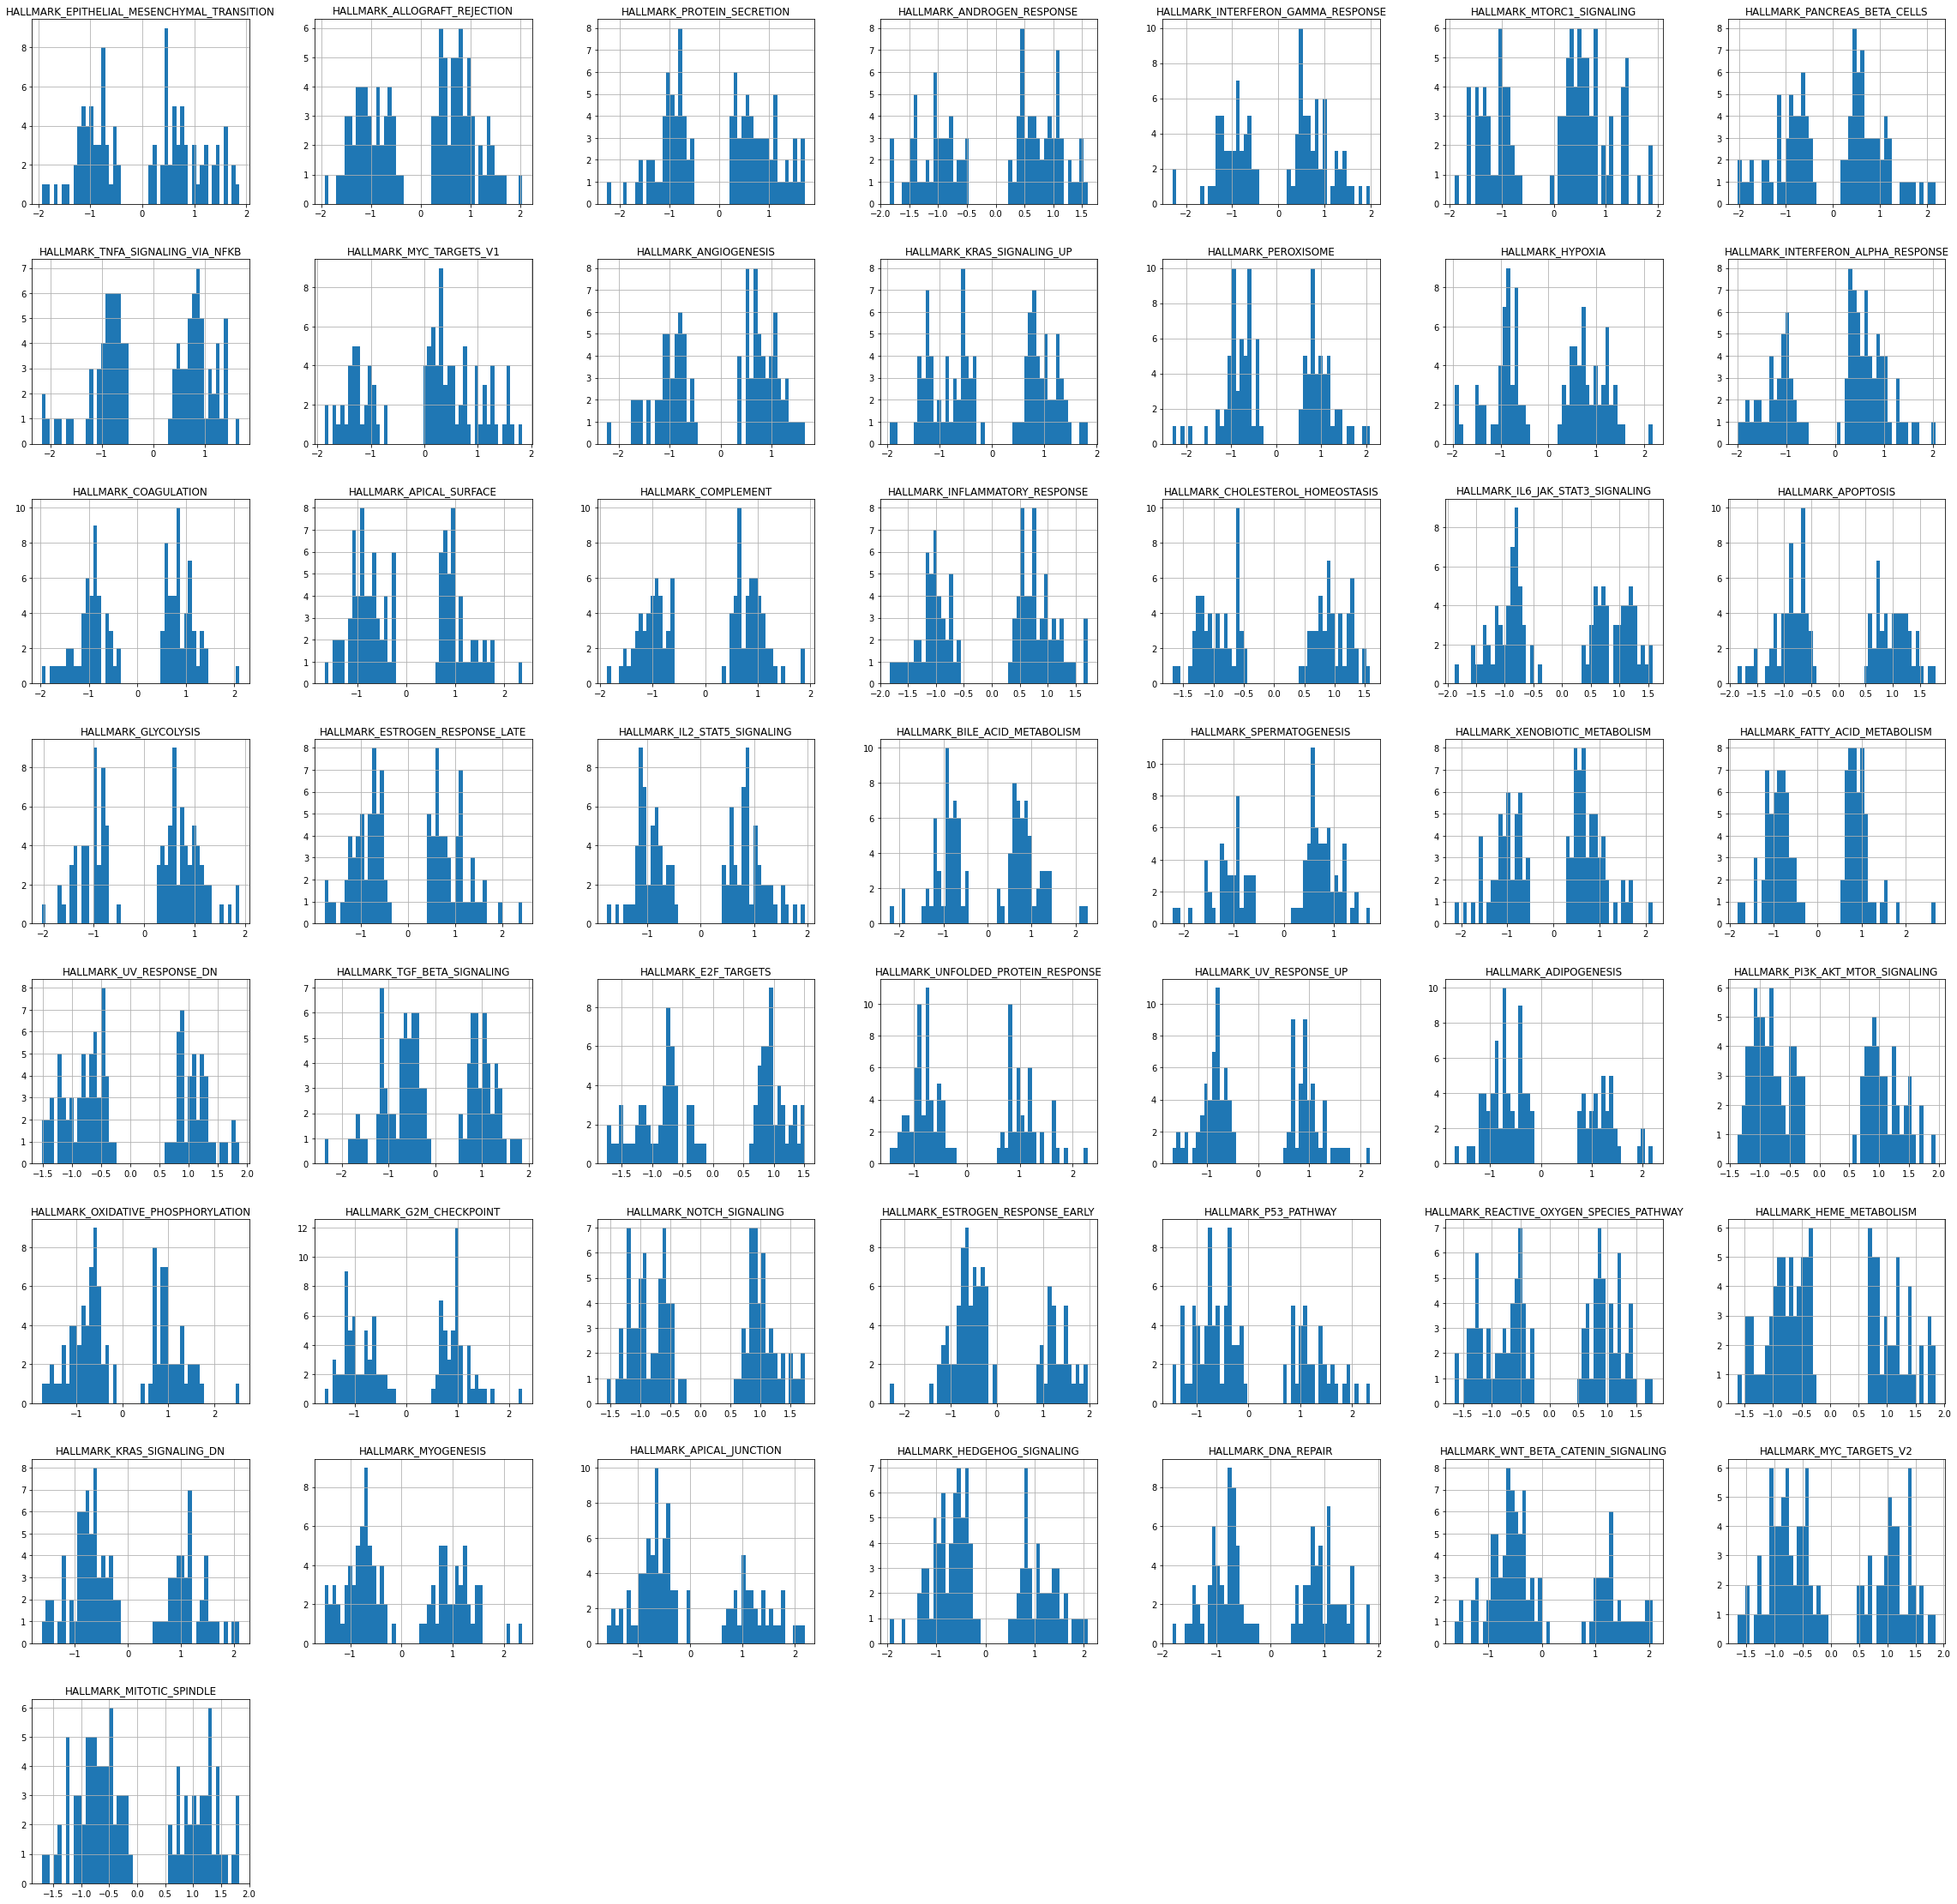

In [36]:
pd.DataFrame(x_std, columns=df_hallmarker.columns).hist(bins=50,figsize=(40,40))

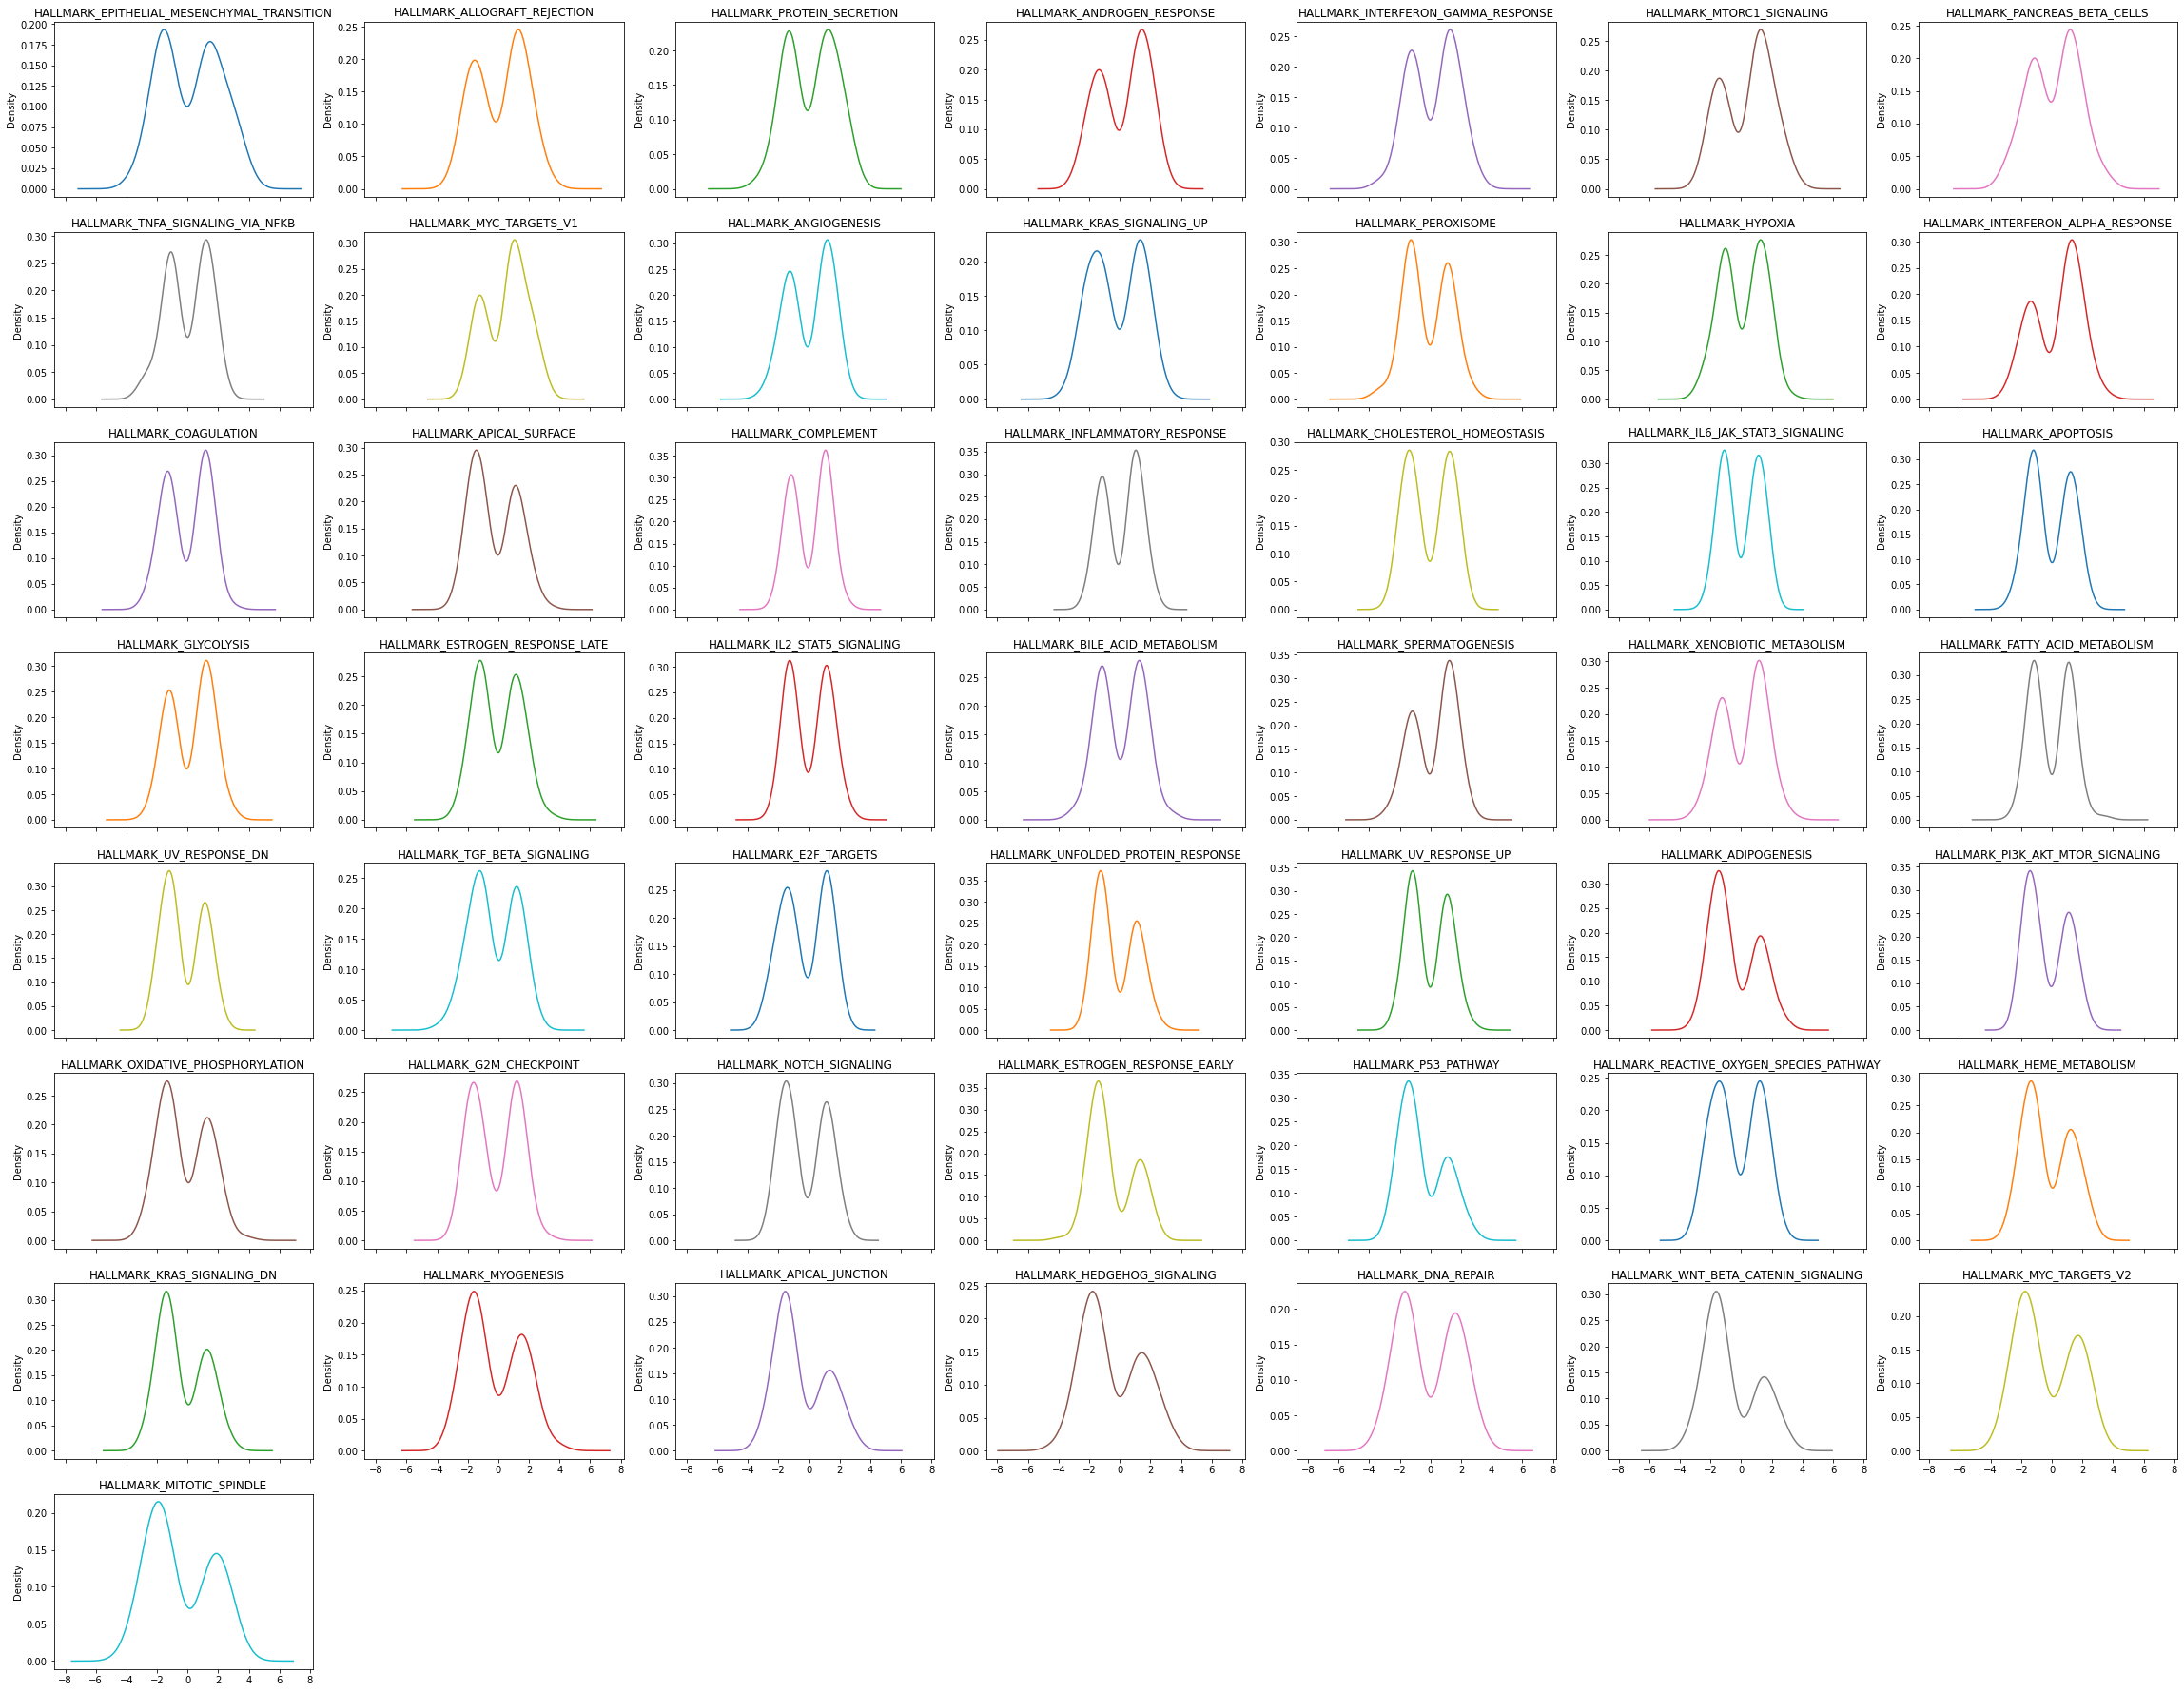

In [49]:

_ = df_hallmarker.plot(kind='kde',figsize=(40,40), subplots=True, layout=(10,7), legend=False, title=list(df_hallmarker.columns))

In [50]:
import seaborn as sns 


In [51]:
df_hallmarker_corr = df_hallmarker.corr() 

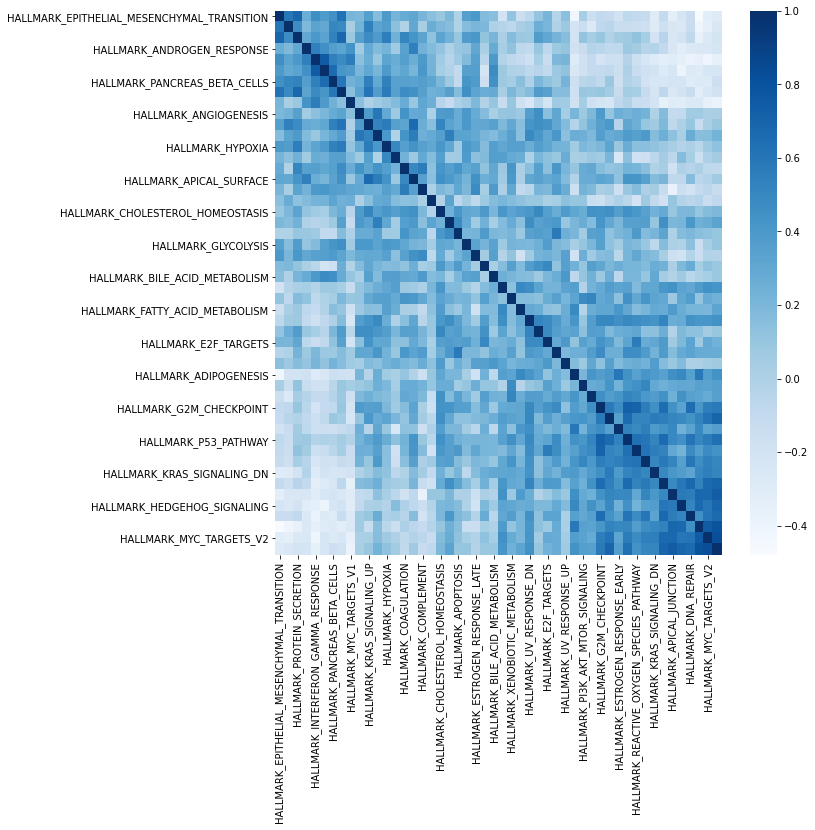

In [59]:
fig, ax = plt.subplots() 
sns.heatmap(df_hallmarker_corr, ax=ax, cmap=plt.cm.Blues)
fig.set_size_inches(10,10)